# Modeling & Evaluation

Goal: Build predictive models for Canadian salaries using survey data.  
We will:
1. Prepare features and target
2. Train/test split
3. Train multiple models (linear regression, random forest, gradient boosting)
4. Evaluate with R², MAE, RMSE
5. Compare results and select the best-performing model


In [12]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [13]:
# Load Data
salary = pd.read_csv("../data/processed/canadian_salary_data_clean.csv")

# target transformation: log of salary
salary["log_salary"] = np.log1p(salary["salary_(usd)"])
salary.head()


,year,company_size,industry,experience,title,country,salary_(usd),city,log_salary
0,2023,10 to 19 employees,"Information Services, IT, Software Development...",5 to 9 years,Data scientist or machine learning specialist,Canada,52046.0,Halifax,10.859902
1,2023,100 to 499 employees,"Manufacturing, Transportation, or Supply Chain",10 or more years,"Developer, full-stack",Canada,64686.0,Montreal,11.077316
2,2023,20 to 99 employees,"Information Services, IT, Software Development...",2 to 4 years,"Developer, full-stack",Canada,59481.0,Hamilton–Niagara Peninsula,10.993429
3,2023,20 to 99 employees,"Manufacturing, Transportation, or Supply Chain",5 to 9 years,Data or business analyst,Canada,63199.0,Halifax,11.054060
4,2023,100 to 499 employees,"Information Services, IT, Software Development...",5 to 9 years,"Developer, front-end",Canada,53533.0,Montreal,10.888072


## Features & Target
We use categorical features for encoding and log_salary as target.

In [14]:
# Select features
features = ["experience","industry","city","company_size","year"]
X = salary[features]
y = salary["log_salary"]

# Categorical vs numeric
cat_features = ["experience","industry","city","company_size"]
num_features = ["year"]

# Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ("num", "passthrough", num_features)
])

## Train/Test Split

In [15]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
We test 3 models: Linear Regression, Random Forest, Gradient Boosting

In [16]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

In [17]:
# Train & Evaluate
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(np.expm1(y_test), np.expm1(preds))
    rmse = mean_squared_error(np.expm1(y_test), np.expm1(preds), squared=False)

    results.append({"Model": name, "R²": r2, "MAE ($)": mae, "RMSE ($)": rmse})

results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
results_df

c:\Users\87114\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\87114\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\87114\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,R²,MAE ($),RMSE ($)
2,Gradient Boosting,0.847007,5013.861725,7178.490034
1,Random Forest,0.834105,5021.447103,7457.731036
0,Linear Regression,0.810038,5736.381225,7876.662910


## Compare Models

C:\Users\87114\AppData\Local\Temp\ipykernel_10812\485280020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette=palette, ax=ax, edgecolor="none")
C:\Users\87114\AppData\Local\Temp\ipykernel_10812\485280020.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="MAE ($)", palette=palette, ax=ax, edgecolor="none")


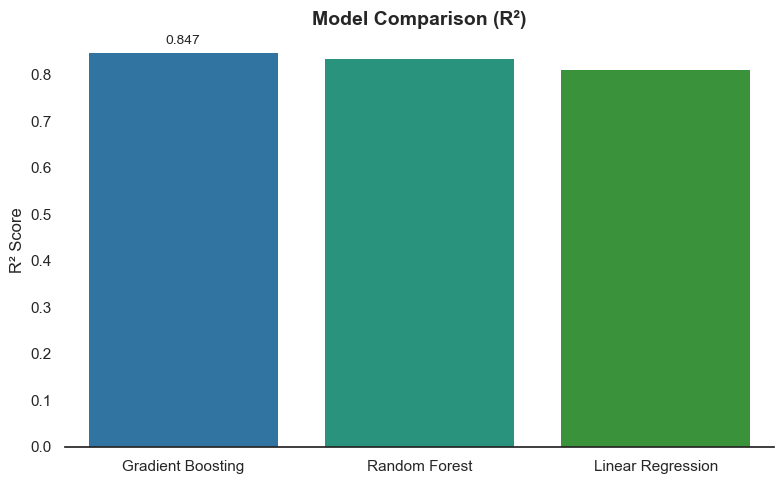

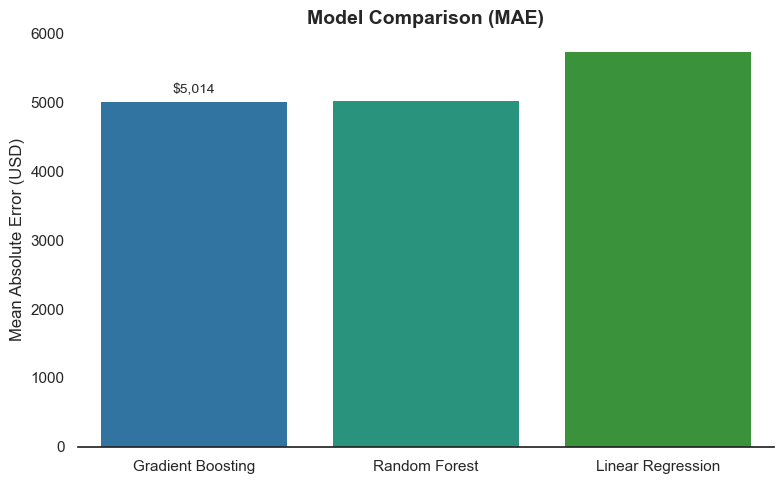

In [18]:
# Visualization of comparison
sns.set_theme(style="white")

palette = sns.color_palette(["#1f77b4", "#17a589", "#2ca02c"])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette=palette, ax=ax, edgecolor="none")
ax.set_title("Model Comparison (R²)", fontsize=14, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("R² Score")
ax.bar_label(ax.containers[0], fmt="%.3f", padding=4, fontsize=10)
sns.despine(left=True)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=results_df, x="Model", y="MAE ($)", palette=palette, ax=ax, edgecolor="none")
ax.set_title("Model Comparison (MAE)", fontsize=14, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Mean Absolute Error (USD)")
ax.bar_label(ax.containers[0], fmt="${:,.0f}".format, padding=4, fontsize=10)
sns.despine(left=True)
plt.tight_layout()

## Conclusion
We compare:
- Linear Regression: baseline performance
- Random Forest: flexible, non-linear model
- Gradient Boosting: usually strong performance on tabular data

The best model is chosen based on highest R² and lowest MAE/RMSE.